In [1]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import metrics

### Problem Statement

We want to see if we can predict the price of an AirBnB in the New York City area

In [2]:
calendar = pd.read_csv('data/calendar.csv')
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2595,6/4/2022,f,$225.00,$225.00,30,1125
1,2595,6/5/2022,f,$225.00,$225.00,30,1125
2,2595,6/6/2022,f,$225.00,$225.00,30,1125
3,2595,6/7/2022,f,$225.00,$225.00,30,1125
4,2595,6/8/2022,f,$225.00,$225.00,30,1125


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
listings = pd.read_csv('data/listings.csv')
listings.head()

C:\Users\matth\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (67) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595.0,https://www.airbnb.com/rooms/2595,2.022060e+13,6/4/2022,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,Jennifer,9/9/2008,"New York, New York, United States",A New Yorker since (Phone number hidden by Air...,a few days or more,39%,19%,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,6.0,6.0,"['email', 'phone', 'work_email']",t,t,"New York, United States",Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,NaN,1 bath,NaN,1.0,"[""Essentials"", ""Bathtub"", ""Extra pillows and b...",$225.00,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,0,3,33,308,6/4/2022,48,0,0,11/21/2009,11/4/2019,4.70,4.72,4.62,4.76,4.79,4.86,4.41,NaN,f,3,3,0,0,0.31
1,5121.0,https://www.airbnb.com/rooms/5121,2.022060e+13,6/4/2022,BlissArtsSpace!,One room available for rent in a 2 bedroom apt...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,Garon,2/3/2009,"New York, New York, United States","I am an artist(painter, filmmaker) and curato...",within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/72a61...,https://a0.muscache.com/im/pictures/user/72a61...,Bedford-Stuyvesant,1.0,1.0,"['email', 'phone']",t,t,NaN,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in rental unit,Private room,2,NaN,NaN,1.0,1.0,"[""Heating"", ""Long term stays allowed"", ""Kitche...",$60.00,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,30,60,90,365,6/4/2022,50,0,0,5/28/2009,12/2/2019,4.52,4.22,4.09,4.91,4.91,4.47,4.52,NaN,f,2,0,2,0,0.32
2,5136.0,https://www.airbnb.com/rooms/5136,2.022060e+13,6/4/2022,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,https://www.airbnb.com/users/show/7378,Rebecca,2/3/2009,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",within an hour,100%,50%,f,https://a0.muscache.com/im/users/7378/profile_...,https://a0.muscache.com/im/users/7378/profile_...,Greenwood Heights,1.0,1.0,"['email', 'phone']",t,t,NaN,Sunset Park,Brooklyn,40.66265,-73.99454,Entire rental unit,Entire home/apt,4,NaN,1.5 baths,2.0,2.0,"[""Dryer"", ""Heating"", ""Hair dryer"", ""Carbon mon...",$275.00,21,1125,21.0,21.0,1125.0,1125.0,21.0,1125.0,NaN,t,3,3,4,250,6/4/2022,2,1,0,1/2/2014,8/8/2021,5.00,5.00,5.00,5.00,5.00,4.50,5.00,NaN,f,1,1,0,0,0.02
3,5178.0,https://www.airbnb.com/rooms/5178,2.022060e+13,6/4/2022,Large Furnished Room N

In [5]:
reviews = pd.read_csv('data/reviews.csv')
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2595.0,17857.0,11/21/2009,50679,Jean,Notre séjour de trois nuits.\r<br/>Nous avons ...
1,2595.0,19176.0,12/5/2009,53267,Cate,Great experience.
2,2595.0,19760.0,12/10/2009,38960,Anita,I've stayed with my friend at the Midtown Cast...
3,2595.0,34320.0,4/9/2010,71130,Kai-Uwe,"We've been staying here for about 9 nights, en..."
4,2595.0,46312.0,5/25/2010,117113,Alicia,We had a wonderful stay at Jennifer's charming...


In [6]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   listing_id      1048575 non-null  int64 
 1   date            1048575 non-null  object
 2   available       1048575 non-null  object
 3   price           1048575 non-null  object
 4   adjusted_price  1048575 non-null  object
 5   minimum_nights  1048575 non-null  int64 
 6   maximum_nights  1048575 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 56.0+ MB


In [7]:
calendar.isnull().sum()

listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64

In [8]:
calendar['date'] = pd.to_datetime(calendar['date'], format='%m/%d/%Y')

In [9]:
calendar['available'].value_counts()

f    732055
t    316520
Name: available, dtype: int64

In [10]:
#1 for "true" and 0 for "false"
calendar['available'] = calendar['available'].map(lambda x: 1 if x == 't' else 0)
calendar['available'].value_counts()

0    732055
1    316520
Name: available, dtype: int64

In [11]:
calendar['price'] = calendar['price'].map(lambda x: x.replace(',',''))
calendar['price'] = calendar['price'].map(lambda x: float(x[1:]) if x[0] == '$' else float(x))

In [12]:
calendar['adjusted_price'] = calendar['adjusted_price'].map(lambda x: x.replace(',',''))
calendar['adjusted_price'] = calendar['adjusted_price'].map(lambda x: float(x[1:]) if x[0] == '$' else float(x))

In [13]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   listing_id      1048575 non-null  int64         
 1   date            1048575 non-null  datetime64[ns]
 2   available       1048575 non-null  int64         
 3   price           1048575 non-null  float64       
 4   adjusted_price  1048575 non-null  float64       
 5   minimum_nights  1048575 non-null  int64         
 6   maximum_nights  1048575 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 56.0 MB


In [14]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37410 entries, 0 to 37409
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            37410 non-null  float64
 1   listing_url                                   37410 non-null  object 
 2   scrape_id                                     37410 non-null  float64
 3   last_scraped                                  37410 non-null  object 
 4   name                                          37396 non-null  object 
 5   description                                   36523 non-null  object 
 6   neighborhood_overview                         22430 non-null  object 
 7   picture_url                                   37410 non-null  object 
 8   host_id                                       37410 non-null  int64  
 9   host_url                                      37410 non-null 

In [15]:
pd.set_option('display.max_rows', None)

In [16]:
listings.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                               14
description                                       887
neighborhood_overview                           14980
picture_url                                         0
host_id                                             0
host_url                                            0
host_name                                          66
host_since                                         66
host_location                                     163
host_about                                      16356
host_response_time                              13210
host_response_rate                              13210
host_acceptance_rate                            11732
host_is_superhost                                  66
host_thumbnail_url          

In [17]:
len(listings)

37410

We have to figure out which columns we need and which we don't

For starters, we don't need listing_url, scrape_id, last_scraped, name, picture_url, host_name, host_since, host_thumbnail_url, host_picture_url, or calendar_last_scraped

In [18]:
listings = listings.drop(columns=['listing_url', 'scrape_id', 'last_scraped', 'name', 'listing_url', 'scrape_id', 'last_scraped',
                                  'name', 'picture_url', 'host_url', 'host_name', 'host_since', 'host_thumbnail_url', 'host_picture_url',
                                  'calendar_last_scraped'])

Same with host location, since it is all in New York

In [19]:
listings = listings.drop(columns=['host_location'])

Now let's look at description

In [20]:
#description is similar to neighborhood_overview so we can combine then drop
listings['full_description'] = np.nan
for i in listings.index:
    if type(listings['description'][i]) == str:
        if type(listings['neighborhood_overview'][i]) == str:
            listings['full_description'][i] = listings['description'][i] + " " + listings['neighborhood_overview'][i]
        else:
            listings['full_description'][i] = listings['description'][i]
    elif type(listings['neighborhood_overview'][i]):
        listings['full_description'][i] = listings['neighborhood_overview'][i]
    else:
        listings['full_description'][i] = np.nan

C:\Users\matth\AppData\Local\Temp/ipykernel_32456/993632117.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings['full_description'][i] = listings['description'][i] + " " + listings['neighborhood_overview'][i]
C:\Users\matth\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [21]:
listings = listings.drop(columns=['description', 'neighborhood_overview'])

In [22]:
#Let's also add host_about to full_description
for i in listings.index:
    if type(listings['full_description'][i]) == str:
        if type(listings['host_about'][i]) == str:
            listings['full_description'][i] = listings['full_description'][i] + " " + listings['host_about'][i]
        else:
            listings['full_description'][i] = listings['full_description'][i]
    elif type(listings['host_about'][i]):
        listings['full_description'][i] = listings['host_about'][i]
    else:
        listings['full_description'][i] = np.nan

C:\Users\matth\AppData\Local\Temp/ipykernel_32456/2684406174.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings['full_description'][i] = listings['full_description'][i] + " " + listings['host_about'][i]
C:\Users\matth\AppData\Local\Temp/ipykernel_32456/2684406174.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings['full_description'][i] = listings['full_description'][i]
C:\Users\matth\AppData\Local\Temp/ipykernel_32456/2684406174.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [23]:
listings = listings.drop(columns=['host_about'])

In [24]:
listings['host_response_time'].value_counts()

within an hour        14578
within a few hours     5516
within a day           3325
a few days or more      781
Name: host_response_time, dtype: int64

I will make an 'unknown' answer for this

In [25]:
host_values = ['within an hour', 'within a few hours', 'within a day', 'a few days or more']

In [26]:
listings['host_response_time'] = listings['host_response_time'].map(lambda x: 'unknown' if x not in host_values else x)

In [27]:
listings['host_response_time'].value_counts()

within an hour        14578
unknown               13210
within a few hours     5516
within a day           3325
a few days or more      781
Name: host_response_time, dtype: int64

Let's drop host_response_rate and host_acceptance_rate since there are too many of them

In [28]:
listings = listings.drop(columns=['host_response_rate', 'host_acceptance_rate'])

host_neighbourhood and neighbourhood is the same so let's drop neighbourhood

In [29]:
listings = listings.drop(columns=['neighbourhood'])

Bathrooms has too many nan values.

In [30]:
listings = listings.drop(columns=['bathrooms', 'bathrooms_text'])

Bedrooms and beds are basically the same same so let's drop bedrooms

In [31]:
listings = listings.drop(columns=['bedrooms'])

Let's fix price

In [32]:
listings['price'] = listings['price'].map(lambda x: x.replace(',',''))
listings['price'] = listings['price'].map(lambda x: float(x[1:]) if x[0] == '$' else float(x))
type(listings['price'])

pandas.core.series.Series

calendar_updated has too many nan values

In [33]:
listings = listings.drop(columns=['calendar_updated'])

Let's combine first_review and last_review

In [34]:
listings['review'] = str(listings['first_review']) + " " + str(listings['last_review'])
listings = listings.drop(columns=['first_review', 'last_review'])

We will drop license then check the nulls again

In [35]:
listings = listings.drop(columns=['license'])

In [36]:
listings.isna().sum()

id                                                 0
host_id                                            0
host_response_time                                 0
host_is_superhost                                 66
host_neighbourhood                              7542
host_listings_count                               66
host_total_listings_count                         66
host_verifications                                 0
host_has_profile_pic                              66
host_identity_verified                            66
neighbourhood_cleansed                             0
neighbourhood_group_cleansed                       0
latitude                                           0
longitude                                          0
property_type                                      0
room_type                                          0
accommodates                                       0
beds                                             901
amenities                                     

I was going to keep many of these columns but there is just too many na

In [37]:
listings = listings.drop(columns=['host_neighbourhood', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                                  'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
                                  'review_scores_value', 'reviews_per_month'])
listings.isna().sum()

id                                                0
host_id                                           0
host_response_time                                0
host_is_superhost                                66
host_listings_count                              66
host_total_listings_count                        66
host_verifications                                0
host_has_profile_pic                             66
host_identity_verified                           66
neighbourhood_cleansed                            0
neighbourhood_group_cleansed                      0
latitude                                          0
longitude                                         0
property_type                                     0
room_type                                         0
accommodates                                      0
beds                                            901
amenities                                         0
price                                             0
minimum_nigh

host_total_listings_counts look like basically the same thing as host_listings_counts so let's just drop it

In [38]:
listings = listings.drop(columns=['host_total_listings_count'])

Too many night values listed. Let's just keep the first 2

In [39]:
listings = listings.drop(columns=['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights',
                                  'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'])

availability_365 incompasses the rest of them, so let's drop the rest

In [40]:
listings = listings.drop(columns=['availability_30', 'availability_60', 'availability_90'])

Number of reviews and calculated host listings seem to be listed multiple times under different names. Let's change that

In [41]:
listings = listings.drop(columns=['number_of_reviews_ltm', 'number_of_reviews_l30d', 'calculated_host_listings_count_entire_homes',
                                  'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'])

lets drop na

In [42]:
listings.dropna(inplace=True)
listings.isna().sum()

id                                0
host_id                           0
host_response_time                0
host_is_superhost                 0
host_listings_count               0
host_verifications                0
host_has_profile_pic              0
host_identity_verified            0
neighbourhood_cleansed            0
neighbourhood_group_cleansed      0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
beds                              0
amenities                         0
price                             0
minimum_nights                    0
maximum_nights                    0
has_availability                  0
availability_365                  0
number_of_reviews                 0
instant_bookable                  0
calculated_host_listings_count    0
full_description                  0
review                            0
dtype: int64

In [43]:
listings.head()

,id,host_id,host_response_time,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,instant_bookable,calculated_host_listings_count,full_description,review
0,2595.0,2845,a few days or more,f,6.0,"['email', 'phone', 'work_email']",t,t,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,1.0,"[""Essentials"", ""Bathtub"", ""Extra pillows and b...",225.0,30,1125,t,308,48,f,3,"Beautiful, spacious skylit studio in the heart...",0 11/21/2009\n1 5/28/2009\n2 ...
1,5121.0,7356,within an hour,f,1.0,"['email', 'phone']",t,t,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in rental unit,Private room,2,1.0,"[""Heating"", ""Long term stays allowed"", ""Kitche...",60.0,30,730,t,365,50,f,2,One room available for rent in a 2 bedroom apt...,0 11/21/2009\n1 5/28/2009\n2 ...
2,5136.0,7378,within an hour,f,1.0,"['email', 'phone']",t,t,Sunset Park,Brooklyn,40.66265,-73.99454,Entire rental unit,Entire home/apt,4,2.0,"[""Dryer"", ""Heating"", ""Hair dryer"", ""Carbon mon...",275.0,21,1125,t,250,2,f,1,We welcome you to stay in our lovely 2 br dupl...,0 11/21/2009\n1 5/28/2009\n2 ...
3,5178.0,8967,within a day,f,1.0,"['email', 'phone']",t,f,Midtown,Manhattan,40.76457,-73.98317,Private room in rental unit,Private room,2,1.0,"[""Conditioner"", ""Essentials"", ""Extra pillows a...",68.0,2,14,t,172,536,f,1,Please don’t expect the luxury here just a bas...,0 11/21/2009\n1 5/28/2009\n2 ...
4,5203.0,7490,unknown,f,1.0,"['email', 'phone']",t,t,Upper West Side,Manhattan,40.80380,-73.96751,Private room in rental unit,Private room,1,1.0,"[""Carbon monoxide alarm"", ""Heating"", ""Essentia...",75.0,2,14,t,0,118,f,1,"Our best guests are seeking a safe, clean, spa...",0 11/21/2009\n1 5/28/2009\n2 ...


Let's turn all t f columns into 1 and 0 columns where 1 is t and 0 is f

In [44]:
listings['host_is_superhost'] = listings['host_is_superhost'].map(lambda x: 1 if x == 't' else 0)
listings['host_has_profile_pic'] = listings['host_has_profile_pic'].map(lambda x: 1 if x == 't' else 0)
listings['host_identity_verified'] = listings['host_identity_verified'].map(lambda x: 1 if x == 't' else 0)
listings['has_availability'] = listings['has_availability'].map(lambda x: 1 if x == 't' else 0)
listings['instant_bookable'] = listings['instant_bookable'].map(lambda x: 1 if x == 't' else 0)

In [45]:
len(listings)

36050

In [46]:
reviews.isna().sum()

listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      5
comments         191
dtype: int64

In [47]:
reviews['date'] = pd.to_datetime(reviews['date'], format='%m/%d/%Y')

In [48]:
reviews.dropna(inplace=True)

Let's look at the heads once again

In [49]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2595,2022-06-04,0,225.0,225.0,30,1125
1,2595,2022-06-05,0,225.0,225.0,30,1125
2,2595,2022-06-06,0,225.0,225.0,30,1125
3,2595,2022-06-07,0,225.0,225.0,30,1125
4,2595,2022-06-08,0,225.0,225.0,30,1125


In [50]:
listings.head()

,id,host_id,host_response_time,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,instant_bookable,calculated_host_listings_count,full_description,review
0,2595.0,2845,a few days or more,0,6.0,"['email', 'phone', 'work_email']",1,1,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,1.0,"[""Essentials"", ""Bathtub"", ""Extra pillows and b...",225.0,30,1125,1,308,48,0,3,"Beautiful, spacious skylit studio in the heart...",0 11/21/2009\n1 5/28/2009\n2 ...
1,5121.0,7356,within an hour,0,1.0,"['email', 'phone']",1,1,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in rental unit,Private room,2,1.0,"[""Heating"", ""Long term stays allowed"", ""Kitche...",60.0,30,730,1,365,50,0,2,One room available for rent in a 2 bedroom apt...,0 11/21/2009\n1 5/28/2009\n2 ...
2,5136.0,7378,within an hour,0,1.0,"['email', 'phone']",1,1,Sunset Park,Brooklyn,40.66265,-73.99454,Entire rental unit,Entire home/apt,4,2.0,"[""Dryer"", ""Heating"", ""Hair dryer"", ""Carbon mon...",275.0,21,1125,1,250,2,0,1,We welcome you to stay in our lovely 2 br dupl...,0 11/21/2009\n1 5/28/2009\n2 ...
3,5178.0,8967,within a day,0,1.0,"['email', 'phone']",1,0,Midtown,Manhattan,40.76457,-73.98317,Private room in rental unit,Private room,2,1.0,"[""Conditioner"", ""Essentials"", ""Extra pillows a...",68.0,2,14,1,172,536,0,1,Please don’t expect the luxury here just a bas...,0 11/21/2009\n1 5/28/2009\n2 ...
4,5203.0,7490,unknown,0,1.0,"['email', 'phone']",1,1,Upper West Side,Manhattan,40.80380,-73.96751,Private room in rental unit,Private room,1,1.0,"[""Carbon monoxide alarm"", ""Heating"", ""Essentia...",75.0,2,14,1,0,118,0,1,"Our best guests are seeking a safe, clean, spa...",0 11/21/2009\n1 5/28/2009\n2 ...


In [51]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2595.0,17857.0,2009-11-21,50679,Jean,Notre séjour de trois nuits.\r<br/>Nous avons ...
1,2595.0,19176.0,2009-12-05,53267,Cate,Great experience.
2,2595.0,19760.0,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...
3,2595.0,34320.0,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, en..."
4,2595.0,46312.0,2010-05-25,117113,Alicia,We had a wonderful stay at Jennifer's charming...


In [52]:
len(calendar['listing_id'].unique())

2873

In [53]:
listings['id'] = listings['id'].map(lambda x: int(x))
reviews['listing_id'] = reviews['listing_id'].map(lambda x: int(x))
len(listings['id'].unique())

35899

In [54]:
len(reviews['listing_id'].unique())

29425

Calendar gives us no new information so we just use listings and reviews. First listings.

In [55]:
listings.tail()

,id,host_id,host_response_time,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,instant_bookable,calculated_host_listings_count,full_description,review
37405,640612000000000000,32162495,within an hour,0,3.0,"['email', 'phone']",1,1,Tompkinsville,Staten Island,40.631656,-74.094878,Entire rental unit,Entire home/apt,6,4.0,"[""Conditioner"", ""Essentials"", ""Children\u2019s...",144.0,3,29,1,61,0,0,3,Looking for clean guests that follow house rules,0 11/21/2009\n1 5/28/2009\n2 ...
37406,640630000000000000,404940500,within an hour,1,1.0,"['email', 'phone']",1,1,Williamsburg,Brooklyn,40.717840,-73.951610,Entire townhouse,Entire home/apt,8,4.0,"[""Essentials"", ""Bathtub"", ""Washer"", ""Extra pil...",620.0,30,180,1,113,0,0,5,**New photos of new bedding arrangements and h...,0 11/21/2009\n1 5/28/2009\n2 ...
37407,640658000000000000,408979935,within an hour,0,13.0,"['email', 'phone']",1,1,Gramercy,Manhattan,40.735540,-73.987880,Private room in rental unit,Private room,2,2.0,"[""Carbon monoxide alarm"", ""Heating"", ""Hair dry...",93.0,30,365,1,118,0,1,16,Thank you for your interest.<br />Who do you r...,0 11/21/2009\n1 5/28/2009\n2 ...
37408,641072000000000000,107434423,within an hour,0,3322.0,"['email', 'phone', 'work_email']",1,1,East Village,Manhattan,40.729638,-73.987644,Entire rental unit,Entire home/apt,2,1.0,"[""Essentials"", ""Bathtub"", ""Wifi"", ""Carbon mono...",462.0,31,1125,1,335,0,1,391,Show up and start living from day one in Downt...,0 11/21/2009\n1 5/28/2009\n2 ...
37409,641241000000000000,355450429,within a few hours,0,483.0,"['email', 'phone']",1,1,Midtown,Manhattan,40.752656,-73.972480,Entire condo,Entire home/apt,2,1.0,"[""Essentials"", ""Bathtub"", ""Washer"", ""Gym"", ""Di...",113.0,1,365,1,4,0,0,4,With a majestic location from which to experie...,0 11/21/2009\n1 5/28/2009\n2 ...


Let's run some EDA first and see what we can find

<AxesSubplot:xlabel='host_response_time', ylabel='price'>

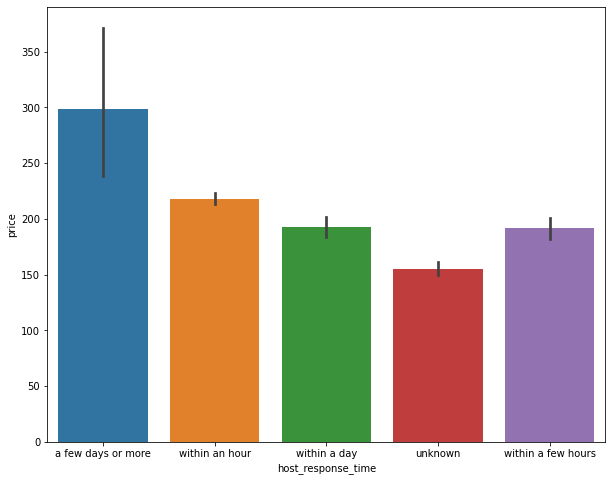

In [56]:
#Price vs host_response_time
plt.figure(figsize=(10,8))
sns.barplot(y="price", x="host_response_time", data=listings)

Interestingly, it seems that the longer it takes for a host to respond, the higher the price of the AirBnB

<AxesSubplot:xlabel='host_is_superhost', ylabel='price'>

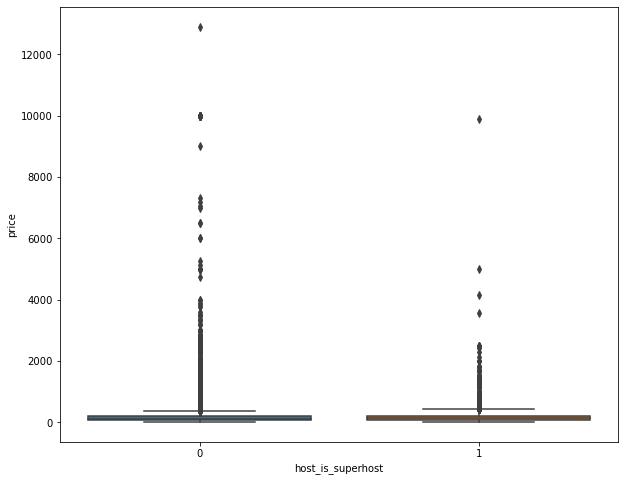

In [57]:
#Price vs host_is_superhost
plt.figure(figsize=(10,8))
sns.boxplot(data=listings, x='host_is_superhost', y='price')

There are too many outliers that we can't see the data. Let's look where the price is under $1000

<AxesSubplot:xlabel='host_is_superhost', ylabel='price'>

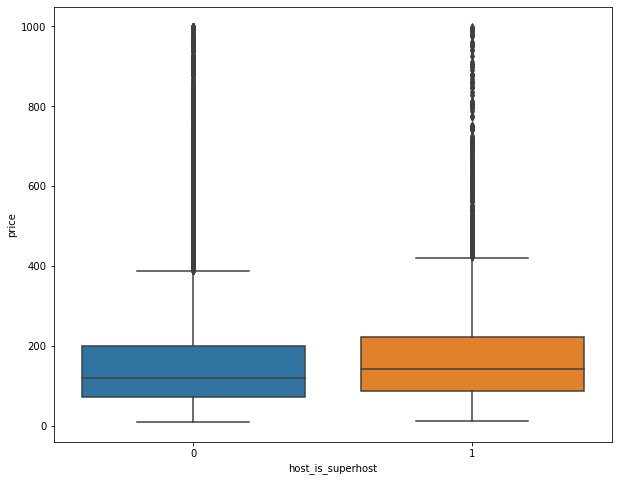

In [58]:
#Price < $1000 vs host_is_superhost
plt.figure(figsize=(10,8))
sns.boxplot(data=listings[listings['price'] < 1000], x='host_is_superhost', y='price')

They look about even with being a superhost maybe being a bit higher.

<AxesSubplot:xlabel='host_listings_count', ylabel='price'>

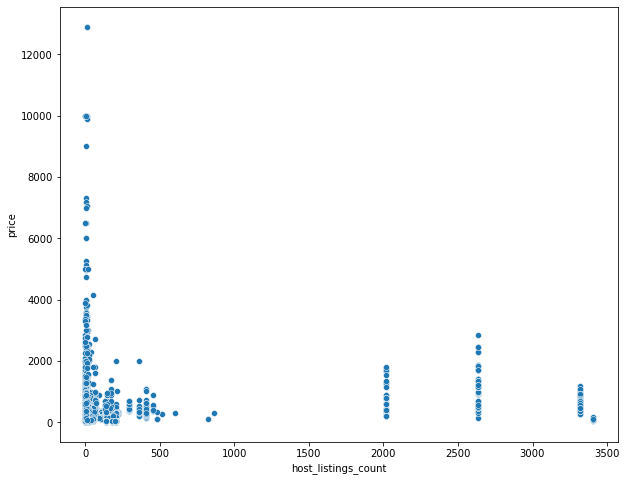

In [59]:
#Price vs host_listings_count
plt.figure(figsize=(10,8))
sns.scatterplot(data=listings, x='host_listings_count', y='price')

There doesn't seem to be any patterns here. 

<AxesSubplot:xlabel='host_has_profile_pic', ylabel='price'>

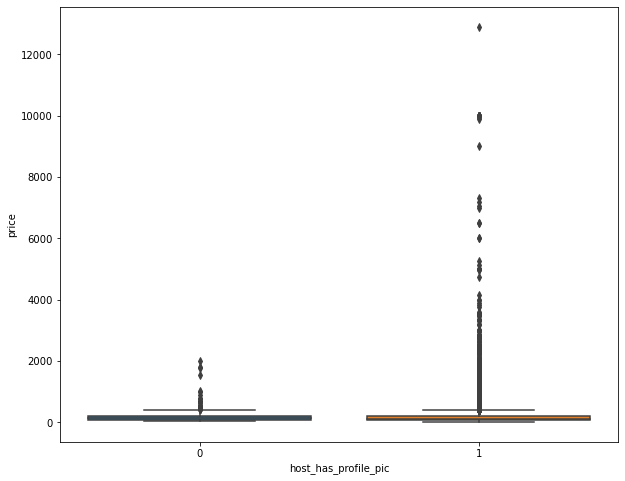

In [60]:
#Price vs host_has_profile_pic
plt.figure(figsize=(10,8))
sns.boxplot(data=listings, x='host_has_profile_pic', y='price')

Again there are a lot of outliers making it hard to see the data so let's zoom in on the less than $1000 group

<AxesSubplot:xlabel='host_has_profile_pic', ylabel='price'>

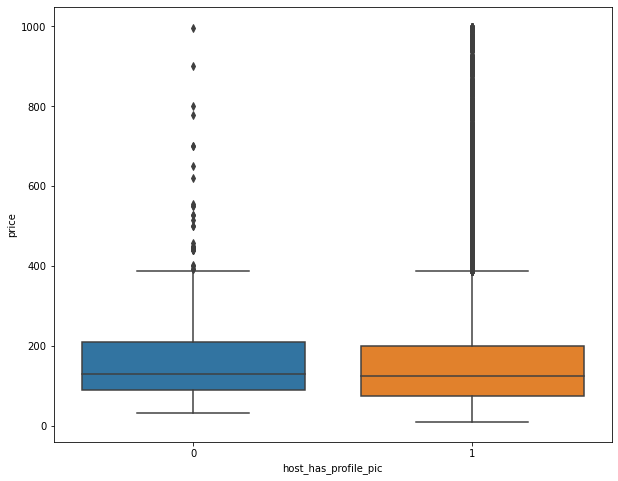

In [61]:
#Price < $1000 vs host_has_profile_pic
plt.figure(figsize=(10,8))
sns.boxplot(data=listings[listings['price'] < 1000], x='host_has_profile_pic', y='price')

They look very similar.

Now that we know there are outliers, let's just look at the less than $1000 for host_identity_verified

<AxesSubplot:xlabel='host_identity_verified', ylabel='price'>

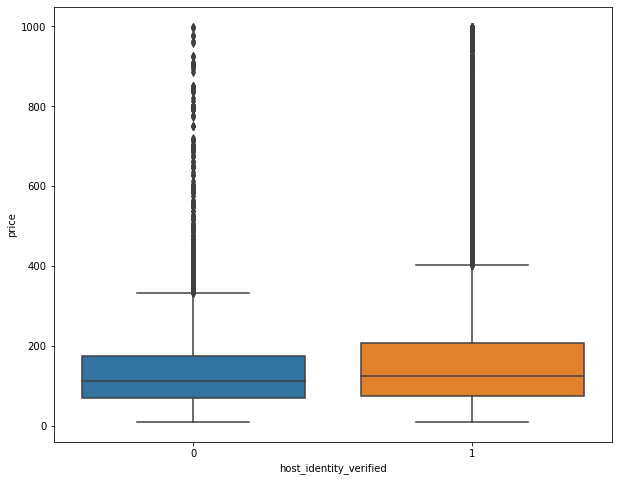

In [62]:
#Price < $1000 vs host_identity_verified
plt.figure(figsize=(10,8))
sns.boxplot(data=listings[listings['price'] < 1000], x='host_identity_verified', y='price')

Having your identity verified at best gives a tiny edge on it not being verified

<AxesSubplot:xlabel='neighbourhood_group_cleansed', ylabel='price'>

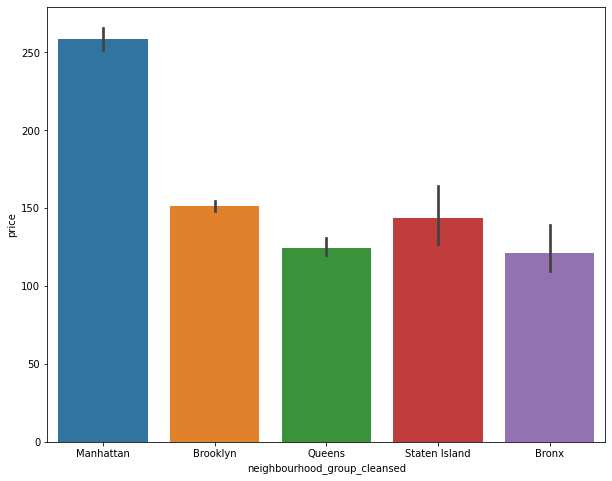

In [63]:
#Price vs boroughs
plt.figure(figsize=(10,8))
sns.barplot(y="price", x="neighbourhood_group_cleansed", data=listings)

Manhattan costs much more than the other boroughs of New York

In [64]:
listings['property_type'].value_counts()

Entire rental unit                    15681
Private room in rental unit            9684
Private room in home                   1920
Entire condo                           1351
Entire home                            1319
Private room in townhouse              1132
Entire loft                             663
Room in hotel                           616
Entire townhouse                        600
Private room in condo                   499
Room in boutique hotel                  411
Shared room in rental unit              373
Entire guest suite                      348
Private room in loft                    253
Entire serviced apartment               253
Private room in guest suite             113
Private room in casa particular          70
Entire place                             63
Entire guesthouse                        57
Room in aparthotel                       56
Private room in serviced apartment       53
Private room in bed and breakfast        52
Private room                    

Too many listings. Let's check out room_type

In [65]:
listings['room_type'].value_counts()

Entire home/apt    20540
Private room       14870
Shared room          478
Hotel room           162
Name: room_type, dtype: int64

<AxesSubplot:xlabel='room_type', ylabel='price'>

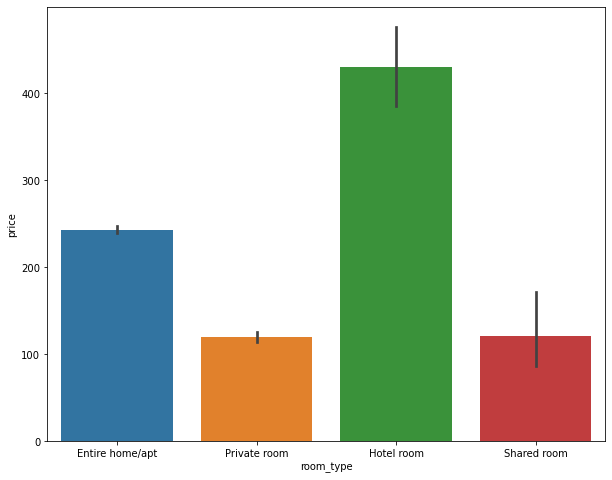

In [66]:
#Price vs Room type
plt.figure(figsize=(10,8))
sns.barplot(y="price", x="room_type", data=listings)

Hotel room is far higher than the other types. Private room and shared room are about equal but much less than entire home/apt

<AxesSubplot:xlabel='minimum_nights', ylabel='price'>

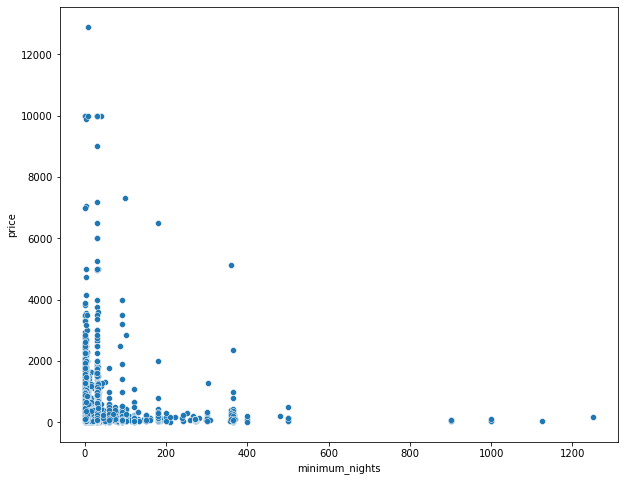

In [67]:
#Price vs Min Nights
plt.figure(figsize=(10,8))
sns.scatterplot(data=listings, x='minimum_nights', y='price')

<AxesSubplot:xlabel='maximum_nights', ylabel='price'>

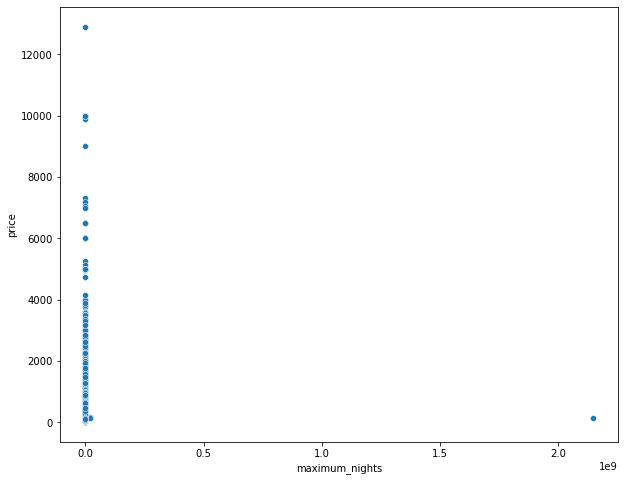

In [68]:
#Price vs Max Nights
plt.figure(figsize=(10,8))
sns.scatterplot(data=listings, x='maximum_nights', y='price')

We don't see a patern for minimum nights. The max nights has such a large outlier we can't see the rest. Let's fix that

<AxesSubplot:xlabel='maximum_nights', ylabel='price'>

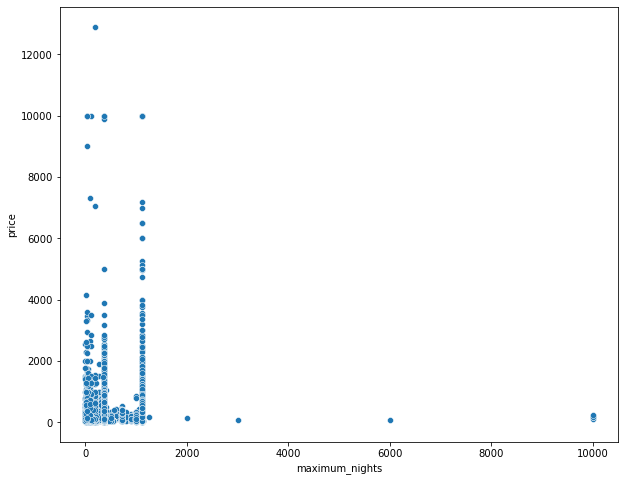

In [69]:
#Price vs Max Nights zoomed in
plt.figure(figsize=(10,8))
sns.scatterplot(data=listings[listings['maximum_nights'] < 2*10**6], x='maximum_nights', y='price')

Can't seem to find a pattern

<AxesSubplot:xlabel='has_availability', ylabel='price'>

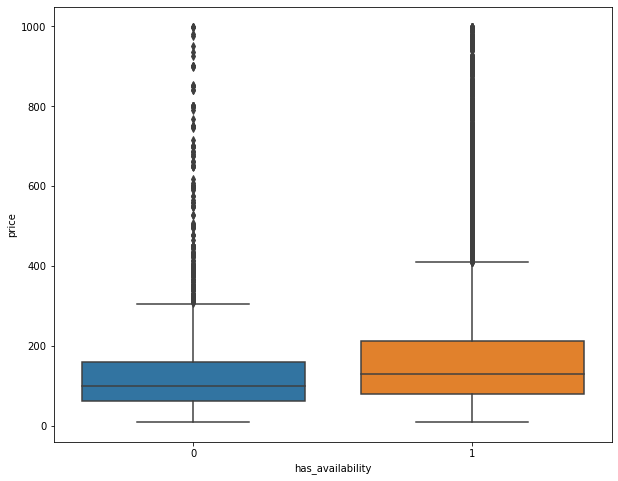

In [70]:
#Price < $1000 vs Has Availability
plt.figure(figsize=(10,8))
sns.boxplot(data=listings[listings['price'] < 1000], x='has_availability', y='price')

Having availability at best only gives a tiny price increase

In [71]:
listings.head()

,id,host_id,host_response_time,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,instant_bookable,calculated_host_listings_count,full_description,review
0,2595,2845,a few days or more,0,6.0,"['email', 'phone', 'work_email']",1,1,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,1.0,"[""Essentials"", ""Bathtub"", ""Extra pillows and b...",225.0,30,1125,1,308,48,0,3,"Beautiful, spacious skylit studio in the heart...",0 11/21/2009\n1 5/28/2009\n2 ...
1,5121,7356,within an hour,0,1.0,"['email', 'phone']",1,1,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in rental unit,Private room,2,1.0,"[""Heating"", ""Long term stays allowed"", ""Kitche...",60.0,30,730,1,365,50,0,2,One room available for rent in a 2 bedroom apt...,0 11/21/2009\n1 5/28/2009\n2 ...
2,5136,7378,within an hour,0,1.0,"['email', 'phone']",1,1,Sunset Park,Brooklyn,40.66265,-73.99454,Entire rental unit,Entire home/apt,4,2.0,"[""Dryer"", ""Heating"", ""Hair dryer"", ""Carbon mon...",275.0,21,1125,1,250,2,0,1,We welcome you to stay in our lovely 2 br dupl...,0 11/21/2009\n1 5/28/2009\n2 ...
3,5178,8967,within a day,0,1.0,"['email', 'phone']",1,0,Midtown,Manhattan,40.76457,-73.98317,Private room in rental unit,Private room,2,1.0,"[""Conditioner"", ""Essentials"", ""Extra pillows a...",68.0,2,14,1,172,536,0,1,Please don’t expect the luxury here just a bas...,0 11/21/2009\n1 5/28/2009\n2 ...
4,5203,7490,unknown,0,1.0,"['email', 'phone']",1,1,Upper West Side,Manhattan,40.80380,-73.96751,Private room in rental unit,Private room,1,1.0,"[""Carbon monoxide alarm"", ""Heating"", ""Essentia...",75.0,2,14,1,0,118,0,1,"Our best guests are seeking a safe, clean, spa...",0 11/21/2009\n1 5/28/2009\n2 ...


<AxesSubplot:xlabel='availability_365', ylabel='price'>

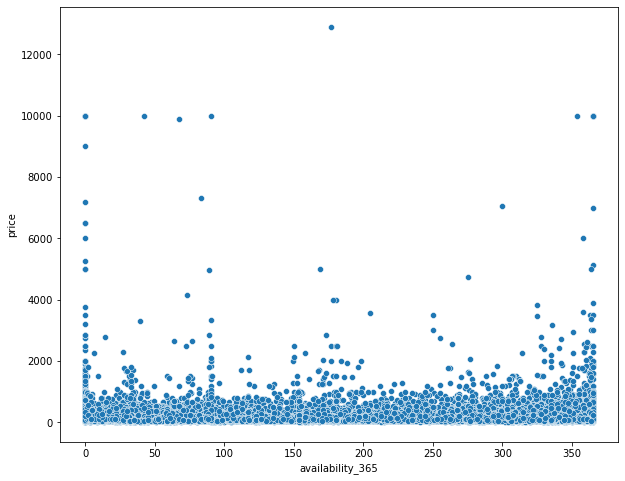

In [72]:
#Price vs availability_365
plt.figure(figsize=(10,8))
sns.scatterplot(data=listings, x='availability_365', y='price')

We can't see any pattern here

<AxesSubplot:xlabel='number_of_reviews', ylabel='price'>

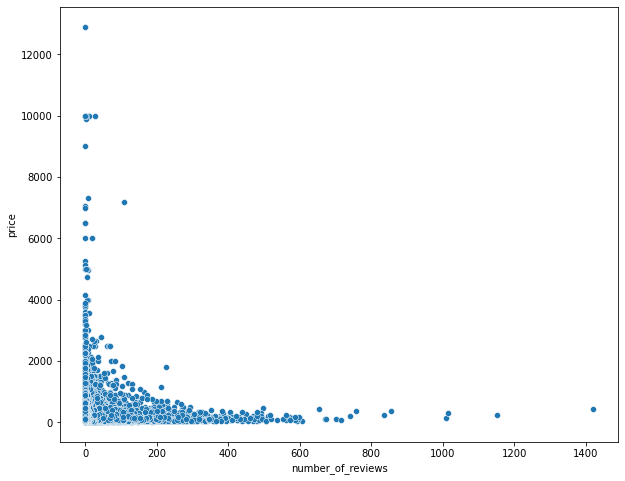

In [73]:
#Price vs Number of Reviews
plt.figure(figsize=(10,8))
sns.scatterplot(data=listings, x='number_of_reviews', y='price')

Again, no pattern can be seen

<AxesSubplot:xlabel='instant_bookable', ylabel='price'>

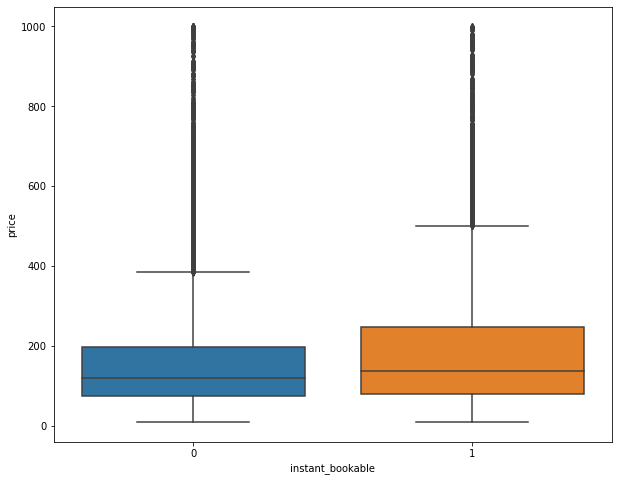

In [74]:
#Price < $1000 vs Instant Bookable
plt.figure(figsize=(10,8))
sns.boxplot(data=listings[listings['price'] < 1000], x='instant_bookable', y='price')

Instant bookable only marginally increases the price

<AxesSubplot:xlabel='calculated_host_listings_count', ylabel='price'>

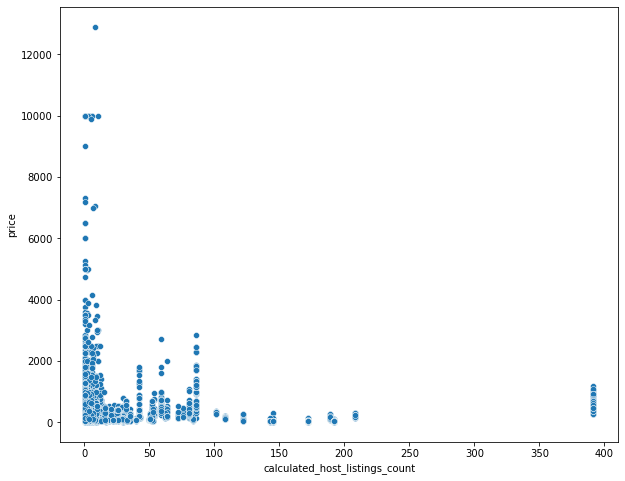

In [75]:
#Price vs Host Listings Count
plt.figure(figsize=(10,8))
sns.scatterplot(data=listings, x='calculated_host_listings_count', y='price')

No pattern

In [76]:
listings.head()

,id,host_id,host_response_time,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,instant_bookable,calculated_host_listings_count,full_description,review
0,2595,2845,a few days or more,0,6.0,"['email', 'phone', 'work_email']",1,1,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,1.0,"[""Essentials"", ""Bathtub"", ""Extra pillows and b...",225.0,30,1125,1,308,48,0,3,"Beautiful, spacious skylit studio in the heart...",0 11/21/2009\n1 5/28/2009\n2 ...
1,5121,7356,within an hour,0,1.0,"['email', 'phone']",1,1,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in rental unit,Private room,2,1.0,"[""Heating"", ""Long term stays allowed"", ""Kitche...",60.0,30,730,1,365,50,0,2,One room available for rent in a 2 bedroom apt...,0 11/21/2009\n1 5/28/2009\n2 ...
2,5136,7378,within an hour,0,1.0,"['email', 'phone']",1,1,Sunset Park,Brooklyn,40.66265,-73.99454,Entire rental unit,Entire home/apt,4,2.0,"[""Dryer"", ""Heating"", ""Hair dryer"", ""Carbon mon...",275.0,21,1125,1,250,2,0,1,We welcome you to stay in our lovely 2 br dupl...,0 11/21/2009\n1 5/28/2009\n2 ...
3,5178,8967,within a day,0,1.0,"['email', 'phone']",1,0,Midtown,Manhattan,40.76457,-73.98317,Private room in rental unit,Private room,2,1.0,"[""Conditioner"", ""Essentials"", ""Extra pillows a...",68.0,2,14,1,172,536,0,1,Please don’t expect the luxury here just a bas...,0 11/21/2009\n1 5/28/2009\n2 ...
4,5203,7490,unknown,0,1.0,"['email', 'phone']",1,1,Upper West Side,Manhattan,40.80380,-73.96751,Private room in rental unit,Private room,1,1.0,"[""Carbon monoxide alarm"", ""Heating"", ""Essentia...",75.0,2,14,1,0,118,0,1,"Our best guests are seeking a safe, clean, spa...",0 11/21/2009\n1 5/28/2009\n2 ...


The biggest indecators so far seem to be borough and room type but let's make some dummy variables and look at a correlation heat map 
to create a model

In [77]:
len(listings['neighbourhood_cleansed'].unique())

241

In [78]:
len(listings['property_type'].unique())

77

Because these are so large it'll take time to run a heatmap on it

In [79]:
dummy_array = ['host_response_time', 'neighbourhood_group_cleansed', 'room_type', 'neighbourhood_cleansed', 'property_type']
listings_dummy = pd.get_dummies(listings, columns=dummy_array, drop_first=False)

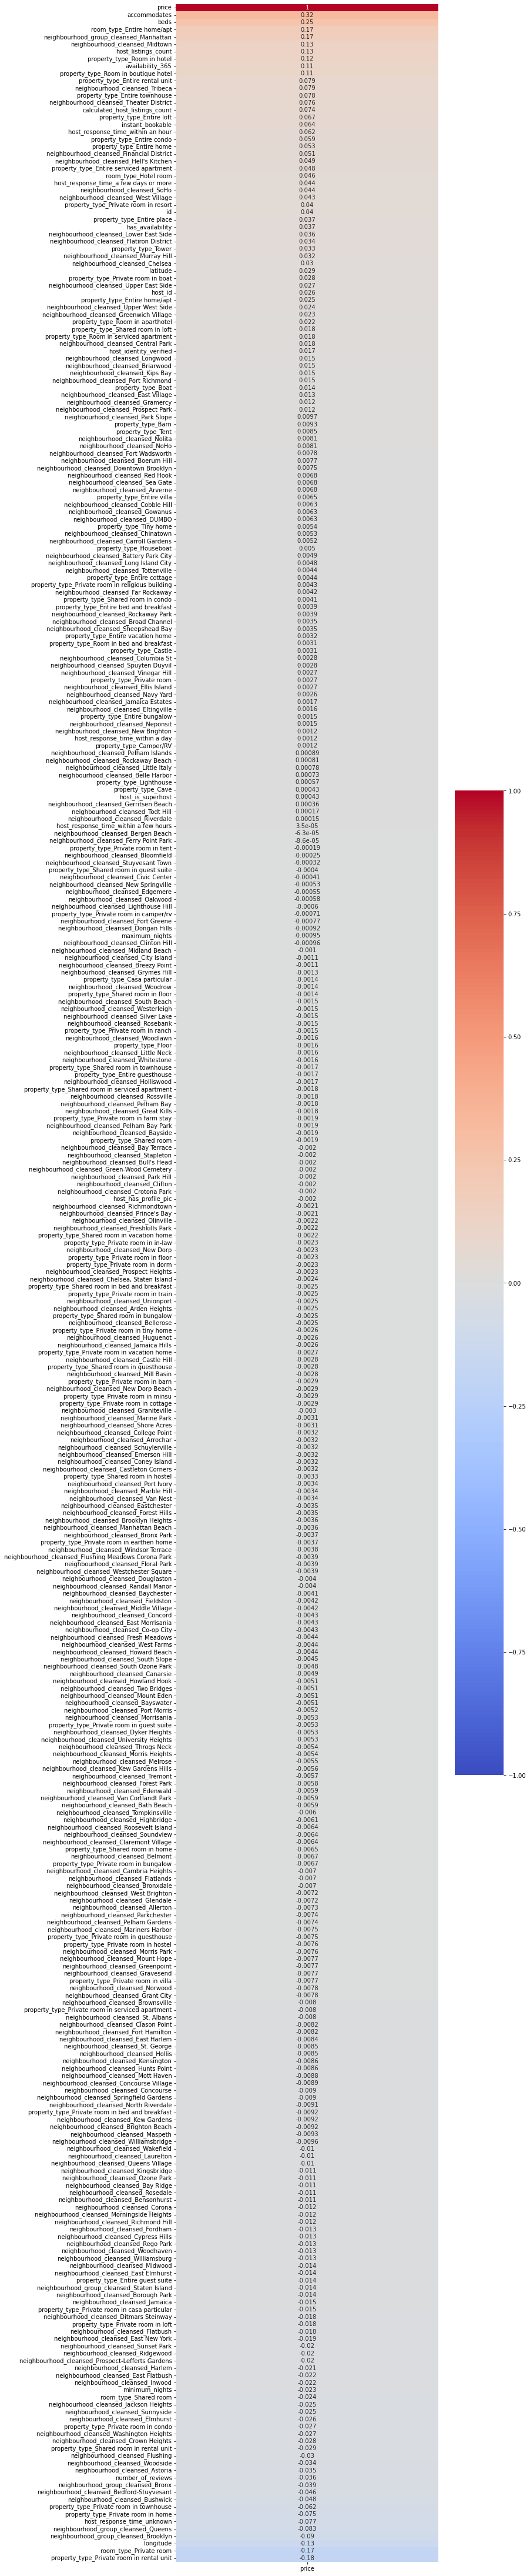

In [80]:
#look at the heat map again
plt.figure(figsize=(10,80))
sns.heatmap(listings_dummy.corr()[['price']].sort_values(by='price',ascending=False),
            annot = True,
            vmin = -1,
            vmax = 1,
            cmap = 'coolwarm');

Let's create a model. I'll keep adding features until the model doesn't get better. (Note: I did not save all of them what you are seeing is the best model)

In [81]:
xvars = ['accommodates', 'beds', 'property_type_Private room in rental unit', 'room_type_Entire home/apt',
         'neighbourhood_group_cleansed_Manhattan', 'room_type_Private room', 'neighbourhood_cleansed_Midtown', 'host_listings_count',
         'longitude', 'property_type_Room in hotel', 'availability_365', 'property_type_Room in boutique hotel', 
         'neighbourhood_group_cleansed_Brooklyn', 'property_type_Entire rental unit', 'neighbourhood_cleansed_Tribeca',
         'property_type_Entire townhouse', 'host_response_time_unknown', 'neighbourhood_cleansed_Theater District',
         'property_type_Private room in home']
X = listings_dummy[xvars]
X.head()

,accommodates,beds,property_type_Private room in rental unit,room_type_Entire home/apt,neighbourhood_group_cleansed_Manhattan,room_type_Private room,neighbourhood_cleansed_Midtown,host_listings_count,longitude,property_type_Room in hotel,availability_365,property_type_Room in boutique hotel,neighbourhood_group_cleansed_Brooklyn,property_type_Entire rental unit,neighbourhood_cleansed_Tribeca,property_type_Entire townhouse,host_response_time_unknown,neighbourhood_cleansed_Theater District,property_type_Private room in home
0,1,1.0,0,1,1,0,1,6.0,-73.98559,0,308,0,0,1,0,0,0,0,0
1,2,1.0,1,0,0,1,0,1.0,-73.95512,0,365,0,1,0,0,0,0,0,0
2,4,2.0,0,1,0,0,0,1.0,-73.99454,0,250,0,1,1,0,0,0,0,0
3,2,1.0,1,0,1,1,1,1.0,-73.98317,0,172,0,0,0,0,0,0,0,0
4,1,1.0,1,0,1,1,0,1.0,-73.96751,0,0,0,0,0,0,0,1,0,0


In [82]:
y = listings_dummy['price']
y.head()

0    225.0
1     60.0
2    275.0
3     68.0
4     75.0
Name: price, dtype: float64

Let's make a polynomial function

In [83]:
poly = PolynomialFeatures(include_bias = False, degree = 2)

In [84]:
X_poly = poly.fit_transform(X)

Now it is time for our train test split



In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=42)

We will use a linear regression model and see how well it fits the data

In [86]:
lr = LinearRegression()

In [87]:
lr.fit(X_train, y_train)

LinearRegression()

In [88]:
prediction = lr.predict(X_test)

Let us look at our R2 score

In [89]:
print(f'Training R2: {lr.score(X_train, y_train)}')
print(f'Testing R2: {lr.score(X_test, y_test)}')

Training R2: 0.24936401981726952
Testing R2: 0.19728277961683116


And the cross validation score

In [90]:
cross_val_score(lr, X_train, y_train, cv = 5).mean()

0.17327874481088731

This is the best linear regression model I could come up with. As we see it isn't that good of a model. Maybe we can improve it with...